# Data Analysis Data : E-Commerce Public Dataset
- Nama:   Fawwaz Atha Rohmatullah
- Email: fawazzzatha@gmail.com
- ID Dicoding: fawwazatha

# Menentukan Pertanyaan Bisnis
1. Among all product categories, which one sells the most, and what is the total sales figure for this top-selling category?
2. How does the sales trend evolve on a monthly basis, from January 2017 to 2018?
3. What is the average spending customer, and is there variation based on geographical location?
4. Geographic ocation with the ighest ustomer concentration

# Import Semua Packages/Library yang Digunakan

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns



sns.set_style("whitegrid")

# 1. Data Wrangling

in the gathering process, I put all the data into a dictionary so that we can easily preprocess all the data at the same time.
In the following subsections, here's what we will do
- Gathering Data
- Assessing Data
- Cleaning Data

## 1.1 Gathering Data

In [274]:
orders = pd.read_csv('orders_dataset.csv')
items = pd.read_csv('order_items_dataset.csv')
products = pd.read_csv( 'products_dataset.csv')
payments = pd.read_csv( 'order_payments_dataset.csv')
reviews = pd.read_csv('order_reviews_dataset.csv')
customers = pd.read_csv( 'customers_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')
geolocation = pd.read_csv( 'geolocation_dataset.csv')
category = pd.read_csv( 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [275]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [276]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.62,sao paulo,SP
1,1046,-23.55,-46.66,sao paulo,SP
2,1046,-23.55,-46.66,sao paulo,SP
3,1041,-23.55,-46.62,sao paulo,SP
4,1035,-23.55,-46.66,sao paulo,SP


In [277]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [278]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [279]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [280]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [281]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [282]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [283]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 1.2 Assessing Data

For the assessing data subsections, we will outline the tasks that we plan to perform.For the assessing data subsections, here's what we will do.
- Checking data types
- checking missing values
- checking duplicates

1.2.1 Check for All of The Data Types

In [284]:
for data_nm, df in data.items():
    print(f"\n,{data[data_nm].info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

,None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

1.2.2 Check for Duplicates

In [285]:
count_duplicate = {}
data_length = {}
for df_name, df in data.items():
    count_duplicate[df_name] = df.duplicated().sum()
    data_length[df_name] = df.shape[0]

count_duplicate_df = pd.DataFrame.from_dict(count_duplicate, orient='index', columns=['Duplicate Count'])
data_length = pd.DataFrame.from_dict(data_length, orient='index', columns=['Data Length'])
pd.concat([count_duplicate_df, data_length], axis=1)

,Duplicate Count,Data Length
orders,0,99441
items,0,112650
products,0,32951
payments,0,103886
reviews,0,99224
customers,0,99441
sellers,0,3095
geo,914718,1000163
category,0,71


1.2.3 Check for Missing Values

In [286]:
for df_name, df in data.items():
    print(df_name, "\n" ,data[df_name].isnull().sum(), "\n")

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

## 1.3 Data Cleaning

1.3.1 Convert to DateTime

Here i want to convert all the time data to datetime data type so that we can easly analyze with the date data later on

In [287]:
orders_time=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in orders_time:
    data["orders"][col] = pd.to_datetime(data["orders"][col]) 
    
review_time = ["review_creation_date","review_answer_timestamp"]

for col in review_time:
    data["reviews"][col] = pd.to_datetime(data["reviews"][col]) 
    
data['items']["shipping_limit_date"] = pd.to_datetime(data['items']['shipping_limit_date']) 

1.3.2 Order

This dataset is vital for our analysis because it uses order_id as a link to many other datasets. Think of it as a key that helps us connect information across different parts of our data. 

In [288]:
data["orders"].order_status.value_counts(normalize=True) * 100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

I will only used them for the delivered category to ensure data completed transactions and eliminating noise, so drop these order id for another dataset as well that have order id as their foreign key

In [289]:
filtered = data["orders"]
filtered_id = filtered[filtered["order_status"] != "delivered"]["order_id"].values

for key, df in data.items(): 
    if "order_id" in df.columns: 
        df.drop(df[df["order_id"].isin(filtered_id)].index, inplace=True)

In [290]:
data["orders"].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Let's also drop these missing values in delivered data as well as other dataset that contain the same order id

In [291]:
null_delivered_date = data["orders"] 
null_delivered_date = null_delivered_date[null_delivered_date["order_delivered_customer_date"].isnull()]["order_id"].values 

for key, df in data.items(): 
    if "order_id" in df.columns: 
        df.drop(df[df["order_id"].isin(null_delivered_date)].index, inplace=True)

We can also see if it was delivered on time to the customers or not

In [292]:
data["orders"]["is_ontime"] = np.where(data["orders"]["order_delivered_customer_date"] < data["orders"]["order_estimated_delivery_date"], 1, 0)

In [293]:
data["orders"]["is_ontime"].value_counts()

1    88644
0     7826
Name: is_ontime, dtype: int64

1.3.3 Items

The dataset looks have lots of nan values on comment title (88.26%), let's easly drop these missing values since we dont know where this data comment actually have got so we can't try to impute these using the actual values 

In [294]:
data["reviews"].isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       85149
review_comment_message     57259
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [295]:
data["reviews"].drop("review_comment_title", axis=1, inplace=True)

In [296]:
data["reviews"].isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_message     57259
review_creation_date           0
review_answer_timestamp        0
dtype: int64

1.3.4 Products

Let's drop some features that I think are not necessary for this analysis 

In [297]:
drop_cols = [
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(drop_cols, axis= 1, inplace= True)

In [298]:
data["products"].shape

(32951, 4)

In [299]:
data["products"].isnull().sum()

product_id                 0
product_category_name    610
product_name_lenght      610
product_photos_qty       610
dtype: int64

1.3.5 Geo

We already know that geo dataset have some duplicate data, so just drop it to get the clean data

In [300]:
data['geo'].drop_duplicates(inplace=True)

# 2. Exploratory Data Analysis

It's time to explore preprocessed dataset to gain a better understanding and merging all the data

In [301]:
customer = data["customers"]
product = data["products"]
order = data["orders"]
geo = data["geo"]
seller = data["sellers"]
category = data["category"]
review = data["reviews"]
payment = data["payments"]
item = data["items"]

## 2.1 Explore Customers

In [302]:
customer.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
26362,45057034171e0faa788fa42f644dd62c,33a18dbb2518bd7cafd046c6bc403150,1405,sao paulo,SP
24465,4e2bf783a80c004ceb49a68cf872d1a7,24bc45b93041e78e892e0f0fd92104d4,17475,lucianopolis,SP
4412,dbc778788a25fd96ca5e9e77ca52cccd,82295e39e2c0d06b12e6223d614bcb95,4844,sao paulo,SP
65143,c85ee5414c8ecc5cf4e2b17d5ab4ed32,da31b1e727489a49662997c05c745b43,96180,camaqua,RS
91268,76e4b20577a9afb78dc9b7dd335316ed,4704cb39c34e6ce5e70d69d37a2e1431,5366,sao paulo,SP


In [303]:
customer.groupby("customer_city")[["customer_id"]].nunique().sort_values("customer_id",ascending=False).head(10).reset_index()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [304]:
customer.groupby("customer_state")[["customer_id"]].nunique().sort_values("customer_id",ascending=False).head(10).reset_index()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


## 2.2 Explore Payments

In [305]:
payment.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27593,51b293b7ef9af17da9a922ce4069c202,1,credit_card,1,131.47
45470,c5bc852c581a2a4b56aacec903138baa,1,credit_card,3,316.79
42600,d194a451e2505ee2c351841d07e83eaf,1,boleto,1,95.31
47988,fa3b973e0d6218a2905cf9808c158794,1,credit_card,1,100.54
11831,b7af6b8813fa3bb23a67f2fd8284db1e,1,credit_card,5,340.47


In [306]:
payment["payment_type"].value_counts()

credit_card    74579
boleto         19191
voucher         5493
debit_card      1485
Name: payment_type, dtype: int64

In [307]:
payment.groupby(["payment_type"])[["payment_value"]].sum().reset_index().sort_values("payment_value", ascending=False)

,payment_type,payment_value
1,credit_card,12100070.20
0,boleto,2769932.58
3,voucher,343013.19
2,debit_card,208066.88


## 2.3 Explore products & category

In [308]:
df_cat_products = pd.merge(
                            products,
                            category,
                            how="left",
                            left_on="product_category_name",
                            right_on="product_category_name"
                    )

In [309]:
df_cat_products.head(5)

,product_id,product_category_name,product_name_lenght,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,4.0,housewares


In [310]:
photos_count = df_cat_products.groupby("product_category_name_english")[["product_photos_qty"]].size().sort_values(ascending=False).head(10).reset_index()
photos_count.columns = ['Product Category', 'Count']
photos_count

,Product Category,Count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


In [311]:
df_cat_products.groupby("product_category_name_english")[["product_id"]].nunique().sort_values("product_id",ascending=False).head(10).reset_index()

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


In [312]:
df_cat_products.groupby("product_category_name")[["product_id"]].nunique().sort_values("product_id",ascending=False).head(10).reset_index()

,product_category_name,product_id
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


## 2.4 Explore customers_df & orders_df

In [313]:
df_cus_order = pd.merge(
                         order,
                         customer,
                         how="left",
                         left_on="customer_id",
                         right_on="customer_id"
                )

In [314]:
city_ontime = df_cus_order.groupby("customer_city")[["is_ontime"]].size().sort_values(ascending=False).head(10).reset_index()
city_ontime.columns = ["customer_city", "ontime_count"]
city_ontime

,customer_city,ontime_count
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


## 2.5 Explore payments & reviews

In [315]:
df_payment_reviews = pd.merge(
                         payment,
                         reviews,
                         how="left",
                         left_on="order_id",
                         right_on="order_id"
                )

In [316]:
df_payment_reviews.groupby("payment_type").agg({"order_id":"nunique"})

,order_id
payment_type,
boleto,19191
credit_card,74297
debit_card,1484
voucher,3679


In [317]:
df_payment_reviews.groupby("review_score")[["review_id"]].nunique()

,review_id
review_score,
1.0,9309
2.0,2911
3.0,7889
4.0,18862
5.0,56667


- Merge df_cus_order and df_payment_reviews by order id

In [318]:
df_customers = pd.merge(
                            df_cus_order,
                            df_payment_reviews,
                            how="left",
                            left_on="order_id",
                            right_on="order_id"
    
)

In [319]:
df_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_ontime,customer_unique_id,...,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,af07308b275d755c9edb36a90c618231,...,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,3a653a41f6f9fc3d2a113cf8398680e8,...,GO,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,2018-08-18,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101313,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,6359f309b166b0196dbf7ad2ac62bb5a,...,SP,1.0,credit_card,3.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,2017-03-22,2017-03-23 11:02:08
101314,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,da62f9e57a76d978d02ab5362c509660,...,SP,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
101315,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,737520a9aad80b3fbbdad19b66b37b30,...,BA,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
101316,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,5097a5312c8b157bb7be58ae360ef43c,...,RJ,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


## 2.6 Explore Sellers & Items

In [320]:
df_sellers_items = pd.merge(
                            item,
                            seller,
                            how="left",
                            left_on="seller_id",
                            right_on="seller_id"
)

- merge df_sellers_items with df_cat_products by product id

In [321]:
df_sellers = pd.merge(
                            df_cat_products,
                            df_sellers_items,
                            how="left",
                            left_on="product_id",
                            right_on="product_id"
)

In [322]:
df_sellers.head()

,product_id,product_category_name,product_name_lenght,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [323]:
df_sellers.groupby("product_category_name_english").agg({"price":["min","max"]})

price         
                                 min      max
product_category_name_english                
agro_industry_and_commerce     12.99  2990.00
air_conditioning               10.90  1599.00
art                             5.35  6499.00
arts_and_craftmanship           9.80   289.49
audio                          14.90   598.99
...                              ...      ...
stationery                      2.29  1693.00
tablets_printing_image         14.90   889.99
telephony                       5.00  2428.00
toys                            4.90  1699.99
watches_gifts                   8.99  3999.90

[71 rows x 2 columns]

## 2.7 Explore Geo

In [324]:
geo.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
854400,81940,-25.58,-49.30,curitiba,PR
375480,17602,-21.94,-50.53,tupã,SP
1482,1106,-23.53,-46.62,sao paulo,SP
873038,85415,-24.61,-53.34,cafelandia,PR
779877,70200,-15.82,-47.88,brasilia,DF


## 2.8 Explore All Data

In [325]:
combined = pd.merge(
                        df_customers,
                        df_sellers,
                        how="left",
                        left_on="order_id",
                        right_on="order_id"
)

In [326]:
combined.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_ontime,customer_unique_id,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,af07308b275d755c9edb36a90c618231,...,1.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP


In [327]:
combined.shape

(115715, 35)

In [328]:
combined = combined.drop_duplicates("order_id")

In [329]:
combined.shape

(96470, 35)

In [330]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 115714
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   is_ontime                      96470 non-null  int32         
 9   customer_unique_id             96470 non-null  object        
 10  customer_zip_code_prefix       96470 non-null  int64         
 11  customer_city 

In [331]:
combined.groupby("product_category_name_english").agg({"review_score":["min","max"]})

review_score     
                                       min  max
product_category_name_english                  
agro_industry_and_commerce             1.0  5.0
air_conditioning                       1.0  5.0
art                                    1.0  5.0
arts_and_craftmanship                  1.0  5.0
audio                                  1.0  5.0
...                                    ...  ...
stationery                             1.0  5.0
tablets_printing_image                 1.0  5.0
telephony                              1.0  5.0
toys                                   1.0  5.0
watches_gifts                          1.0  5.0

[71 rows x 2 columns]

In [332]:
combined.groupby("product_category_name_english").agg({"order_id":"nunique",
                                                       "product_name_lenght":"mean"})

,order_id,product_name_lenght
product_category_name_english,,
agro_industry_and_commerce,177,46.169492
air_conditioning,244,51.012295
art,191,47.801047
arts_and_craftmanship,22,46.863636
audio,345,44.817391
...,...,...
stationery,2252,51.129663
tablets_printing_image,79,55.683544
telephony,4078,52.226091


In [333]:
combined.groupby(["seller_city", "seller_state"])[["payment_value"]].mean().sort_values("payment_value", ascending=False).reset_index().head(10)

,seller_city,seller_state,payment_value
0,bofete,SP,3259.820000
1,londrina,SP,1556.700000
2,paincandu,PR,1494.392857
3,ivoti,RS,1474.760000
4,california,PR,1415.441667
5,lages - sc,SC,1098.800000
6,mandaguari,PR,1013.700000
7,montes claros,MG,969.822500
8,mamanguape,PB,949.994615
9,sao jose dos pinhais,PR,941.400000


In [334]:
#combined.to_csv("all_data.csv")

# 3. Visualization and Exploratory Analysis

### 3.1 Among all product categories, which one sells the most, and what is the total sales figure for this top-selling category?

In [335]:
#to answer this question, first I merge the the item and product data, then merge it with orders to get the sales information, and then merge it once again with the category to see which product has the highest sales
prod_item = item.merge(product, on="product_id", how="inner")
products_merged = orders.merge(prod_item, on="order_id", how="inner") 
products_merged = category.merge(products_merged, on="product_category_name", how="inner")

In [336]:
# after getting the necessary data, then I group the product name with product id, price, shipping value and order item because these are the columns we need to analyze
# total sales added freight value so we can sum the total sales with the shipping as well
product_count_sells = products_merged.groupby("product_category_name_english").agg({"product_id":"count",'price':'mean', 'freight_value': 'mean','order_item_id': 'sum'}).sort_values("product_id", ascending=False)
product_count_sells['total_sales'] = product_count_sells['price'] * product_count_sells['order_item_id'] * (1 + product_count_sells['freight_value'] / 100)
product_count_sells["sell_probability"] = product_count_sells["order_item_id"] / product_count_sells["order_item_id"].sum()
product_count_sells = product_count_sells.head(10).reset_index()
product_count_sells

,product_category_name_english,product_id,price,freight_value,order_item_id,total_sales,sell_probability
0,bed_bath_table,10953,93.438762,18.421848,13485,1.492141e+06,0.103566
1,health_beauty,9465,130.283330,18.907323,10849,1.680688e+06,0.083321
2,sports_leisure,8430,113.247159,19.381893,9697,1.311001e+06,0.074474
3,furniture_decor,8160,87.246040,20.637528,11302,1.189552e+06,0.086800
4,computers_accessories,7643,116.265029,18.839465,9649,1.333190e+06,0.074105
5,housewares,6795,90.600249,21.010090,8831,9.681906e+05,0.067823
6,watches_gifts,5857,199.060779,16.752262,6457,1.500658e+06,0.049590
7,telephony,4430,69.945876,15.652910,5034,4.072226e+05,0.038662
8,garden_tools,4268,110.237882,22.645361,5773,7.805191e+05,0.044337
9,auto,4139,139.852464,21.858074,4771,8.130811e+05,0.036642


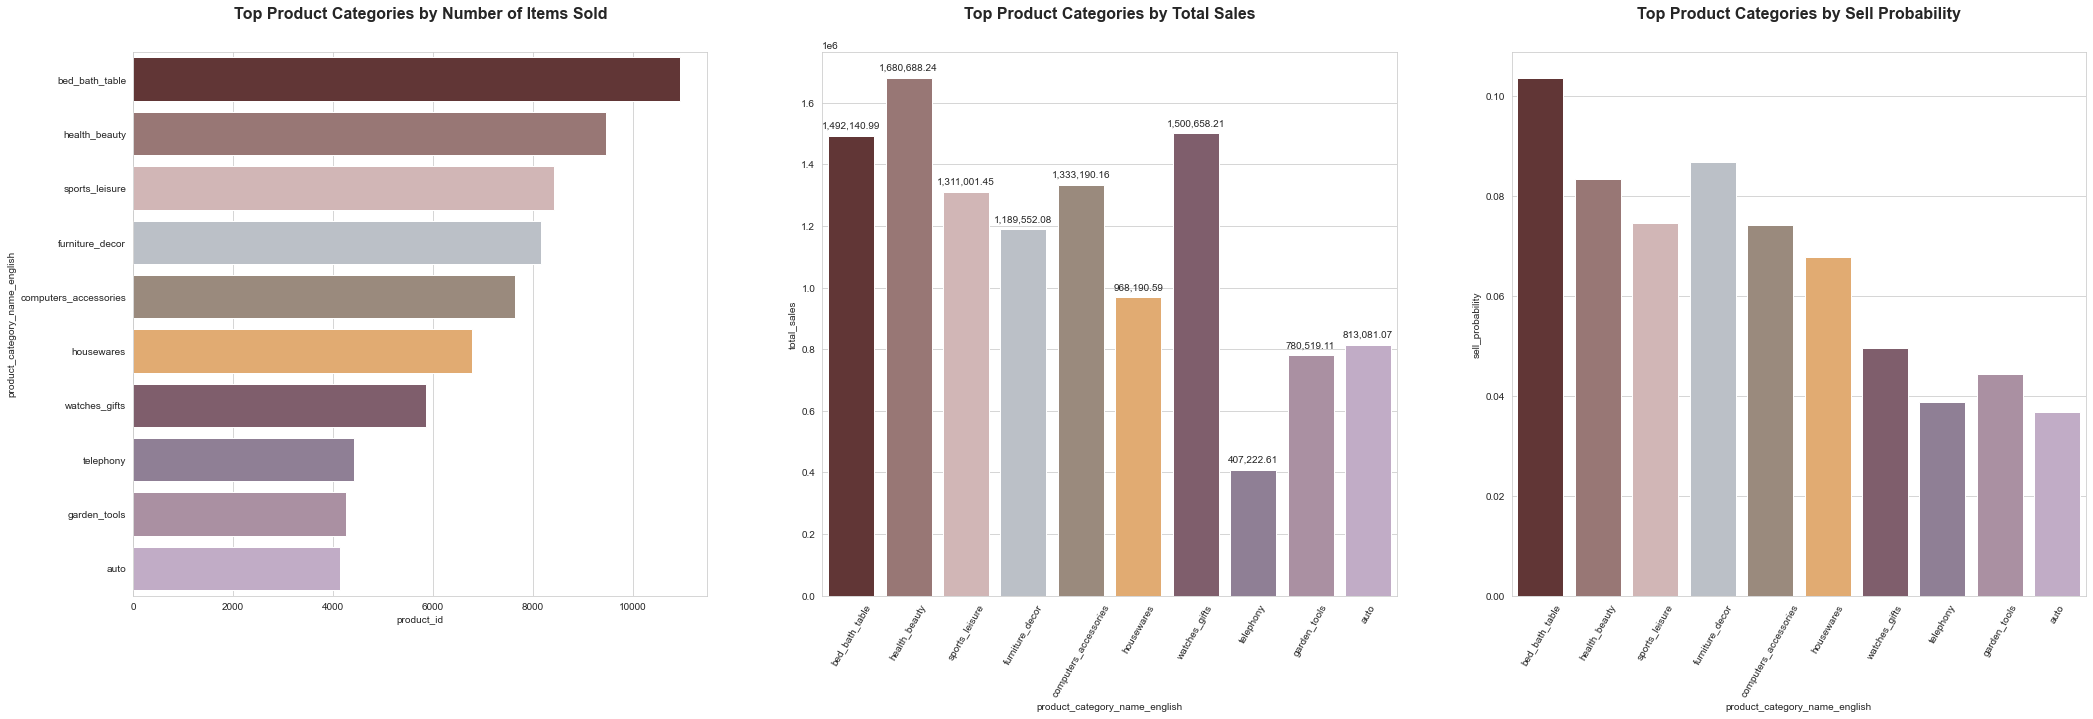

In [337]:
#sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#84596B","#917B99","#AE8CA3","#C4A7CB"]

f, ax = plt.subplots(1,3, figsize=(35,10))
sns.barplot(data=product_count_sells, y="product_category_name_english", x="product_id",palette=palette,ax=ax[0])
bar_plot = sns.barplot(data=product_count_sells, x="product_category_name_english", y="total_sales",palette=palette,ax=ax[1])
sns.barplot(data=product_count_sells, x="product_category_name_english", y="sell_probability", ax=ax[2], palette=palette)

ax[1].tick_params(axis='x', rotation=60)
ax[2].tick_params(axis='x', rotation=60)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
title_font = {'fontsize': 16, 'fontweight': 'bold'}

ax[0].set_title("Top Product Categories by Number of Items Sold",y=1.05,fontdict=title_font)
ax[1].set_title("Top Product Categories by Total Sales", y=1.05, fontdict=title_font)
ax[2].set_title("Top Product Categories by Sell Probability", y=1.05, fontdict=title_font)

plt.show()

It's interesting to see that although bed bath table is the highest selling category, its total sales are lower compared to health and beauty, which could be because health and beauty items are generally more expensive than bed bath table products. But bed bath table still has the highest selling probability.

# 3.2 How does the sales trend evolve on a monthly basis, from January 2017 to 2018?

After the analyzing process turns out that the data from september - december 2018 are missing so 2018 only have data from januari - august

In [338]:
# retrieve the necessary data for orders and items, and merge them so that we can group them later for analyzing the sales trend
# analyze the trend sales in monthly basis so i resample the order approved at with 'M'
orders_date = orders.merge(item, on="order_id", how="inner") 

orders_date_grouped = orders_date.groupby("order_approved_at")[["order_item_id"]].size().reset_index(name="order_count")
orders_date_grouped["year"] = orders_date_grouped["order_approved_at"].dt.year
orders_date_grouped = orders_date_grouped[(orders_date_grouped["year"]==2018) | (orders_date_grouped["year"]==2017)]
monthly_df = orders_date_grouped.resample(rule='M', on='order_approved_at').agg({
    "order_count": "size",
})
monthly_df["month_name"] = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df["year"] = monthly_df["order_approved_at"].dt.year
pivot_data = monthly_df.pivot(index='month_name', columns='year', values='order_count')
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.reset_index()

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

pivot_data["month_numeric"] = pivot_data["month_name"].map(month_mapping)
pivot_data = pivot_data.sort_values("month_numeric")
pivot_data = pivot_data.drop("month_numeric", axis=1)
pivot_data

year,month_name,2017,2018,Total
4,January,702.0,6274.0,6976.0
3,February,1601.0,5899.0,7500.0
7,March,2498.0,6418.0,8916.0
0,April,2210.0,5836.0,8046.0
8,May,3414.0,6048.0,9462.0
6,June,3084.0,5341.0,8425.0
5,July,3715.0,5075.0,8790.0
1,August,4147.0,5750.0,9897.0
11,September,4079.0,NaN,4079.0
10,October,4282.0,NaN,4282.0


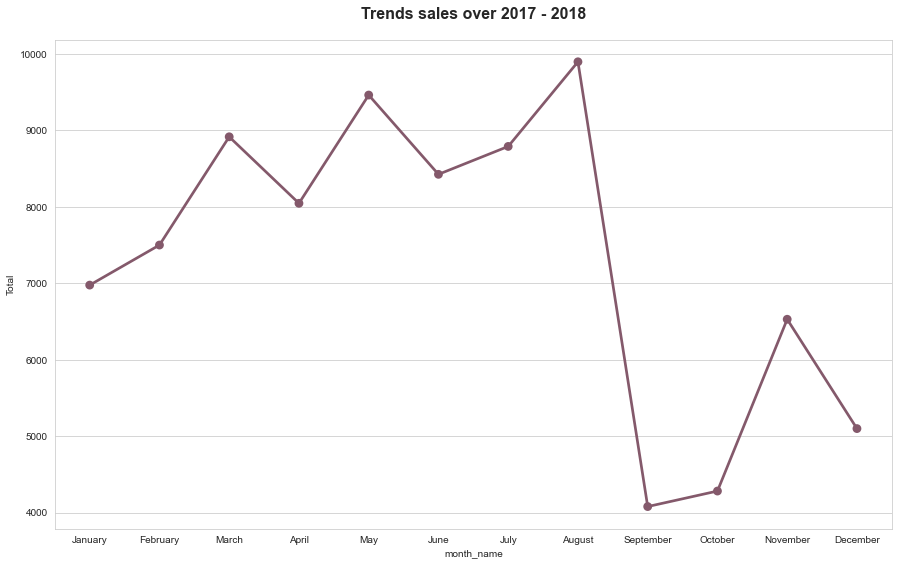

In [339]:
f, ax=plt.subplots(figsize=(15,9))
sns.pointplot(data=pivot_data, x="month_name", y="Total", color="#84596B")
title_font = {'fontsize': 16, 'fontweight': 'bold'}
ax.set_title("Trends sales over 2017 - 2018",y=1.03,fontdict=title_font)
plt.show()

The highest sales are typically observed on Black Friday in November. However, the reported sales for November appear lower than expected. This is due to missing data for November 2018. The available data 2018 spans from Jan - August, but for September - December, only the sales data from 2017 is accounted for. In 2017, November recorded the highest sales, reaching 6529.

# 3.3 What is the average spending customer, and is there variation based on geographical location?

I will keep only the customers who have placed orders and made payments, means im going with inner join instead of outer join

In [340]:
# we need data from orders, payment, customer and merge those data to perform the analysis
order_payment = orders.merge(payment, how="inner", on="order_id")
customer_merged = order_payment.merge(customer, how="inner", on = "customer_id")
customer_spent = customer_merged.groupby(["customer_unique_id"])[["payment_value"]].sum().sort_values("payment_value",ascending=False)
customer_spent

,payment_value
customer_unique_id,
0a0a92112bd4c708ca5fde585afaa872,13664.08
da122df9eeddfedc1dc1f5349a1a690c,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,7274.88
dc4802a71eae9be1dd28f5d788ceb526,6929.31
459bef486812aa25204be022145caa62,6922.21
...,...
6f5b9d1cdccc4d28f0483a612edecacf,11.63
2878e5b88167faab17d4fb83a986d38b,11.63
b33336f46234b24a613ad9064d13106d,10.89


In [341]:
# my idea first is to perform t distribution as well but since the payment value is not normal distribution so i decided to not to use it, cause it can impact the validity of assumptions underlying the t-distribution analysis. then i'll dirrectly 

# visualize the mean for each state directly, without relying on the t-distribution.
customer_regions = customer_merged.groupby("customer_state").agg({"payment_value": [np.mean, np.std], "customer_unique_id":"count"})
#cis = stats.t.interval(0.95, loc=customer_regions['payment_value']['mean'], scale=customer_regions['payment_value']['std']/np.sqrt(customer_regions['customer_unique_id']['count']), df=customer_regions['customer_unique_id']['count'] - 1)
#cis

In [342]:
#customer_regions["low_bound"] = cis[0]
#customer_regions["upper_bound"] = cis[1]
customer_regions.sort_values(by=('payment_value', 'mean'))

payment_value             customer_unique_id
                        mean         std              count
customer_state                                             
SP                136.381676  186.550484              42301
PR                152.450682  205.498182               5129
ES                153.618303  268.498190               2068
MG                154.123823  207.446350              11804
RS                155.440808  188.307113               5543
RJ                158.081394  240.805266              13004
DF                161.599519  234.306395               2142
SC                162.580825  224.398355               3661
GO                163.309340  210.335701               2047
BA                169.759001  240.545031               3483
AM                182.756159  237.148642                151
PE                185.407672  235.814281               1667
MS                186.179418  355.256978                722
RN                197.119961  233.749538                511
CE                198.705421  241.735994               1341
MT                199.605853  266.389734                909
MA                201.098354  252.064324                735
TO                203.414814  280.096920                295
SE                204.328866  230.011715                344
PI                208.873353  243.608335                504
PA                216.134098  278.754492                981
RR                220.476098  213.899272                 41
RO                226.994821  297.040220                251
AL                229.186837  277.386461                411
AP                233.939275  277.815974                 69
AC                235.978916  218.857292                 83
PB                250.153630  384.500942                551

In [343]:
customer_regions1 = customer_regions.copy()
customer_regions1 = customer_regions1.reset_index()
customer_regions1 = customer_regions1.sort_values(by=('payment_value', 'mean'))
"""
f, ax=plt.subplots(figsize=(18,8))
plt.errorbar(customer_regions1.customer_state, customer_regions1["payment_value"]['mean'], yerr=[customer_regions1["payment_value"]['mean'] - customer_regions1['low_bound'], 
                                                                                                 customer_regions1['upper_bound'] - customer_regions1["payment_value"]['mean']], fmt='o', label='Mean with CI', 
                 color='#D6B2B1',  
                ecolor='#D6B2B1',  
                markerfacecolor='#682F2F',  
                markeredgecolor='#682F2F',  )

title_font = {'fontsize': 16, 'fontweight': 'bold'}
ax.set_title("Average Customer Spending with Confidence Intervals by Region",y=1.03,fontdict=title_font)

plt.xlabel('Customer State')
plt.ylabel('Mean Transactions(95% CI)')
plt.legend()
plt.show()
    """

'\nf, ax=plt.subplots(figsize=(18,8))\nplt.errorbar(customer_regions1.customer_state, customer_regions1["payment_value"][\'mean\'], yerr=[customer_regions1["payment_value"][\'mean\'] - customer_regions1[\'low_bound\'], \n                                                                                                 customer_regions1[\'upper_bound\'] - customer_regions1["payment_value"][\'mean\']], fmt=\'o\', label=\'Mean with CI\', \n                 color=\'#D6B2B1\',  \n                ecolor=\'#D6B2B1\',  \n                markerfacecolor=\'#682F2F\',  \n                markeredgecolor=\'#682F2F\',  )\n\ntitle_font = {\'fontsize\': 16, \'fontweight\': \'bold\'}\nax.set_title("Average Customer Spending with Confidence Intervals by Region",y=1.03,fontdict=title_font)\n\nplt.xlabel(\'Customer State\')\nplt.ylabel(\'Mean Transactions(95% CI)\')\nplt.legend()\nplt.show()\n    '

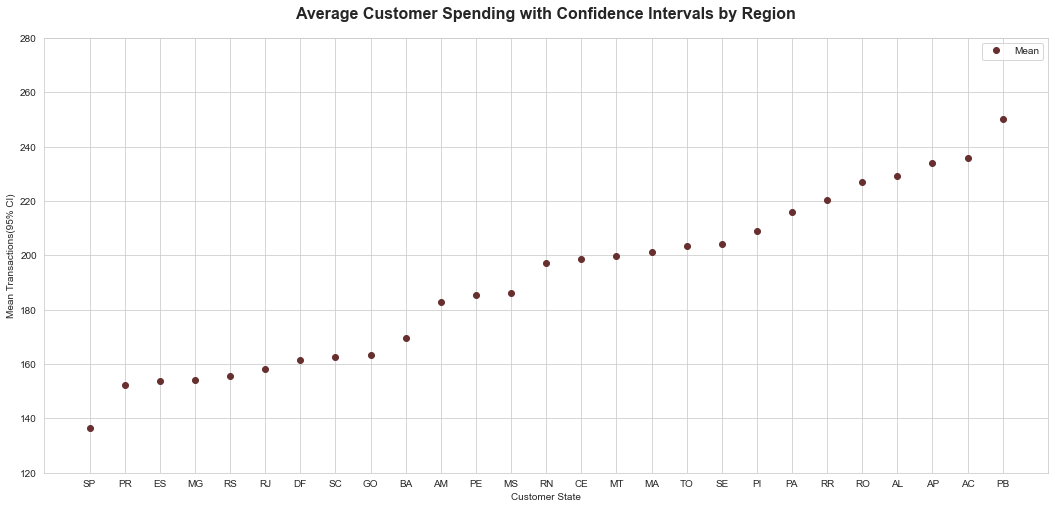

In [344]:
f, ax = plt.subplots(figsize=(18, 8))

# Plot mean payment values without error bars
plt.errorbar(customer_regions1.customer_state, customer_regions1["payment_value"]['mean'], 
             fmt='o', label='Mean', color='#D6B2B1', 
             markerfacecolor='#682F2F', markeredgecolor='#682F2F')

title_font = {'fontsize': 16, 'fontweight': 'bold'}
ax.set_title("Average Customer Spending with Confidence Intervals by Region",y=1.03,fontdict=title_font)
plt.xlabel('Customer State')
plt.ylabel('Mean Transactions(95% CI)')
plt.legend()
plt.ylim(120, 280)
plt.show()

# 3.4 Geographic Location with the Highest Customer Concentration

In [345]:
# let's first calculates the count of unique zip code prefixes for each state.
state = geo.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
state

,geolocation_zip_code_prefix,geolocation_state
0,1001,SP
1,1002,SP
2,1003,SP
3,1004,SP
4,1005,SP
...,...,...
19018,99960,RS
19019,99965,RS
19020,99970,RS
19021,99980,RS


In [387]:
# Second step calculates the median latitude and longitude coordinates for each unique combination of zip code prefix, city, and state. Then merge it with state to get comprehensive view of customer concentration and geographic patterns.
geo_loc = geo.groupby(["geolocation_zip_code_prefix","geolocation_city","geolocation_state"])[["geolocation_lat","geolocation_lng"]].median().reset_index()
geo_loc = pd.merge(geo_loc, state, on=["geolocation_zip_code_prefix","geolocation_state"],how="inner")
geo_loc


,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550,-46.62
1,1001,são paulo,SP,-23.550,-46.62
2,1002,sao paulo,SP,-23.550,-46.62
3,1002,são paulo,SP,-23.550,-46.62
4,1003,sao paulo,SP,-23.550,-46.62
...,...,...,...,...,...
27896,99965,agua santa,RS,-28.190,-52.03
27897,99970,ciriaco,RS,-28.340,-51.88
27898,99970,ciríaco,RS,-28.340,-51.88
27899,99980,david canabarro,RS,-28.405,-51.81


In [391]:
# merging with customer data so we can plot customer based on their geographic locations. 
customer_geo = pd.merge(df_customers, geo_loc, left_on="customer_zip_code_prefix",right_on="geolocation_zip_code_prefix",how="inner")
customer_geo = customer_geo.drop_duplicates(subset='customer_unique_id')
customer_geo

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_ontime,customer_unique_id,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,7c396fd4830fd04220f754e42b4e5bff,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,-23.580,-46.600
6,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,8a4002923e801e3120a11070fd31c9e2,...,3cd186b6013f4145b9bd406847b61f19,5.0,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26,2018-03-27 02:21:27,3149,sao paulo,SP,-23.580,-46.600
10,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,af07308b275d755c9edb36a90c618231,...,8d5266042046a06655c8db133d120ba5,4.0,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,47813,barreiras,BA,-12.125,-45.000
11,d95ca1fcb72812383e41e2eb7ca65dc2,2fd14b072ea7ff170527396ceca430d0,delivered,2017-03-30 20:26:30,2017-03-30 20:42:21,2017-03-31 19:27:48,2017-04-18 13:48:12,2017-05-03,1,f0aa9a24f330070e4bf9b5320c898ce7,...,d38c2458335ad219ac242af5c53a41b7,2.0,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19,2017-04-22 09:51:23,47813,barreiras,BA,-12.125,-45.000
12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,3a653a41f6f9fc3d2a113cf8398680e8,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,2018-08-18,2018-08-22 19:07:58,75265,vianopolis,GO,-16.740,-48.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151384,87334ea6311529ce3e36b18350d2d4b3,02f29ee4753e69018942c30e71c04cfd,delivered,2018-01-20 18:39:14,2018-01-20 19:09:35,2018-01-23 19:29:09,2018-01-31 18:38:38,2018-02-20,1,f86370dc13be4e8958cb036b628afbcc,...,495b3621654bfa0af2a08d9347606c4b,5.0,NaN,2018-02-01,2018-02-02 01:37:30,25932,mage,RJ,-22.610,-43.180
151386,5bd233924f0b9c52492bd5a92e5ab2d3,d7475a536385854da614094f0bf12275,delivered,2018-05-30 13:23:37,2018-05-31 03:15:27,2018-06-04 06:16:00,2018-06-14 22:49:24,2018-07-13,1,17e3c70fc02567ec2d3831fa78e037c0,...,e0a51eca79c9540e758101658214f2b9,5.0,Minha primeira compra veio certinho.,2018-06-15,2018-06-16 04:13:03,77829,araguaina,TO,-7.223,-48.250
151387,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,0,a49e8e11e850592fe685ae3c64b40eca,...,8ea780895f362ce949029f95b7181ff0,1.0,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19,2018-01-21 02:51:39,83870,campo do tenente,PR,-25.975,-49.680
151388,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,1,831ce3f1bacbd424fc4e38fbd4d66d29,...,96e8f371a3983122b739944537e15525,5.0,NaN,2017-03-07,2017-03-11 15:42:41,5127,sao paulo,SP,-23.500,-46.750


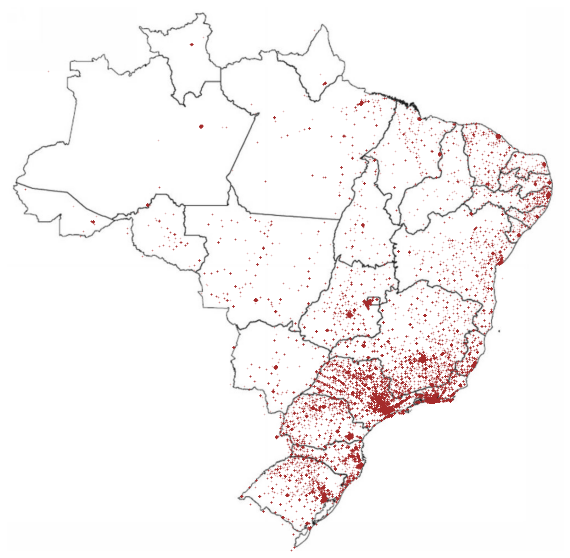

In [394]:
brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg') 
customer_geo.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='brown') 
plt.axis('off') 
plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944, 5.5]) 
plt.show()

Most of the customers come from the southeastern and southern states. 

# Conclusion

- Among all product categories, which one sells the most, and what is the total sales figure for this top-selling category?

    Olist store makes money not by selling a few products a lot, but by offering a variety. The top categories are 'bed_bath_table,' 'health_beauty,' and 'sports_leisure.' Surprisingly, 'health_beauty' earns the most money even though it's not the top-selling category. What's interesting is that 'furniture_decor' has a higher chance of selling compared to the second and third most sold categories.
    
- How does the sales trend evolve on a monthly basis, from January 2017 to 2018?

    Based on the available data, it appears that the Olist store's sales trend has been generally upward from 2017 to 2018, with the exception of the missing data from September to December 2018. But, it is notable that the highest sales occur during Black Friday. To further improve the sales trend, may be consider analyzing the factors that contribute to the increase in sales during Black Friday, such as marketing strategies, product offerings, and pricing. 

- What is the average spending customer, and is there variation based on geographical location?

    The states of AP, AC, and PB have similar average customer spending, with PB showing slightly higher spending compared to the other two states. This information can help Olist understand regional spending habits better. It seems that people in PB might be more generous with their purchases compared to the other states, which could be valuable insight for the company to improve its marketing and sales strategies in those areas.
    
- Geographic location with the highest customer concentration

    Based on the graph, it can be observed that the regions with the highest number of customers are the southeast and south regions. Additionally, it appears that there are more customers in the cities that are considered as the capitals of their respective states such as São Paulo, Rio de Janeiro, and Porto Alegre, among others. This could be indicative of a higher demand for the products offered by the company in these regions and cities.may be because items health beauty is more expensive than bed bath table product. 